# Test set assessment

In [1]:
import argparse
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils 
import sklearn.metrics as metrics
import cPickle as pickle
import sys
from keras.utils import np_utils 


Using Theano backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/peterhirt/anaconda/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
# Compute confusion matrix

#cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

In [5]:
def evaluate(actual,pred):
    fscore = metrics.f1_score(actual, pred, average='macro')
    acc = metrics.accuracy_score(actual, pred)
    cm = metrics.confusion_matrix(actual,pred)

    return fscore, acc, cm

In [26]:
y_val = pickle.load( open( "../pickle/predicted_classes_test_set.pkl", "rb" ) )
y_test = pickle.load( open( "../pickle/y_test.pkl", "rb" ) )

In [27]:
y_test[0:150]

array([4, 1, 4, 3, 1, 2, 3, 3, 4, 1, 4, 4, 1, 4, 1, 3, 3, 3, 4, 4, 4, 4, 0,
       3, 2, 2, 1, 5, 4, 4, 4, 2, 4, 4, 4, 4, 2, 1, 3, 1, 1, 1, 4, 2, 3, 4,
       4, 2, 4, 4, 2, 1, 2, 5, 4, 2, 2, 1, 1, 3, 4, 4, 1, 5, 4, 4, 3, 5, 3,
       1, 2, 3, 3, 4, 4, 4, 3, 1, 4, 5, 1, 4, 1, 4, 1, 4, 1, 4, 3, 2, 3, 3,
       5, 4, 2, 3, 1, 2, 4, 5, 2, 4, 4, 4, 1, 4, 1, 1, 2, 2, 2, 3, 2, 4, 3,
       4, 2, 5, 5, 3, 2, 4, 5, 4, 2, 1, 4, 3, 1, 2, 4, 4, 1, 1, 1, 3, 1, 4,
       5, 3, 3, 1, 4, 4, 1, 1, 4, 4, 4, 4])

In [28]:
y_val[0:150]

array([4, 1, 4, 3, 1, 2, 3, 2, 4, 1, 4, 3, 1, 4, 1, 3, 3, 3, 4, 4, 4, 4, 1,
       3, 2, 3, 1, 1, 4, 4, 4, 2, 4, 4, 4, 4, 1, 1, 3, 1, 1, 1, 3, 2, 3, 4,
       4, 2, 4, 3, 2, 4, 2, 5, 4, 2, 2, 1, 1, 3, 4, 4, 1, 5, 3, 4, 3, 1, 3,
       1, 4, 3, 3, 4, 4, 4, 3, 1, 4, 5, 1, 4, 1, 4, 4, 4, 1, 4, 3, 2, 3, 3,
       5, 4, 3, 3, 1, 2, 4, 5, 3, 4, 4, 4, 1, 4, 1, 1, 2, 3, 2, 3, 2, 3, 3,
       4, 2, 1, 1, 4, 3, 4, 5, 4, 3, 1, 4, 3, 1, 2, 4, 4, 2, 1, 1, 3, 1, 4,
       5, 2, 3, 2, 4, 4, 1, 1, 4, 4, 4, 4])

In [29]:
y_val.shape

(6250,)

In [30]:
y_test.shape

(6250,)

In [31]:
y_val_subset = y_val[:]
y_test_subset = y_test[:]
print 'predicted', y_val_subset
print 'actual   ', y_test_subset

# argmax functions shows the index of the 1st occurence of the highest value in an array
y_actual = np.argmax(y_val_subset)

y_predict = np.argmax(y_test_subset)


predicted [4 1 4 ..., 2 1 1]
actual    [4 1 4 ..., 2 1 1]


In [32]:
target_names = ['consolidation', 'fibrosis', 'ground_glass', 'healthy', 'micronodules', 'reticulation']
# 


f-score is :  0.817347701928
accuray is :  0.88288
confusion matrix
[[  27   13    9    0    0    0]
 [   0  977   61   15   39   25]
 [   1   31  675  124   29    8]
 [   0    5   33 1461   63    3]
 [   1   24   11   91 2157    5]
 [   0   92   19   12   18  221]]


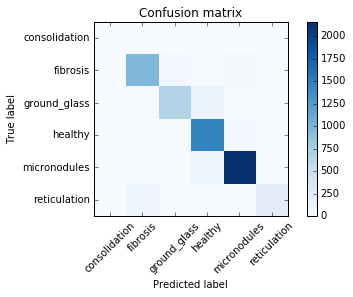

In [33]:
fscore, acc, cm = evaluate(y_test_subset, y_val_subset)
print 'f-score is : ', fscore
print 'accuray is : ', acc
print 'confusion matrix'
print cm
plt.figure()
plot_confusion_matrix(cm)